In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r1/title_r1_1.25k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 1250 drug-target pairs
encoding drug...
unique drugs: 1238
encoding protein...
unique target sequence: 494
splitting dataset...
Done.


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 52.0960. Total time 0.00055 hours
Validation at Epoch 1 with loss:15.5016, MSE: 15.5016 , Pearson Correlation: -0.0493 with p-value: 5.84E-01 , Concordance Index: 0.47622
Training at Epoch 2 iteration 0 with loss 14.4201. Total time 0.00277 hours
Validation at Epoch 2 with loss:3.35491, MSE: 3.35491 , Pearson Correlation: -0.0429 with p-value: 6.34E-01 , Concordance Index: 0.47842
Training at Epoch 3 iteration 0 with loss 2.99924. Total time 0.00527 hours
Validation at Epoch 3 with loss:14.8175, MSE: 14.8175 , Pearson Correlation: -0.0380 with p-value: 6.73E-01 , Concordance Index: 0.47648
Training at Epoch 4 iteration 0 with loss 14.3369. Total time 0.00833 hours
Validation at Epoch 4 with loss:2.99373, MSE: 2.99373 , Pearson Correlation: -0.0192 with p-value: 8.31E-01 , Concordance Index: 0.48397
Training at Epoch 5 iteration 0 with loss 2.46786. Total time 0.01861 hours
Valida

Training at Epoch 39 iteration 0 with loss 1.84807. Total time 5.8575 hours
Validation at Epoch 39 with loss:2.61816, MSE: 2.61816 , Pearson Correlation: 0.04311 with p-value: 6.33E-01 , Concordance Index: 0.51627
Training at Epoch 40 iteration 0 with loss 1.70983. Total time 6.02527 hours
Validation at Epoch 40 with loss:2.69596, MSE: 2.69596 , Pearson Correlation: 0.04258 with p-value: 6.37E-01 , Concordance Index: 0.51589
Training at Epoch 41 iteration 0 with loss 1.70775. Total time 6.20055 hours
Validation at Epoch 41 with loss:2.64623, MSE: 2.64623 , Pearson Correlation: 0.04808 with p-value: 5.94E-01 , Concordance Index: 0.51524
Training at Epoch 42 iteration 0 with loss 1.78880. Total time 6.36194 hours
Validation at Epoch 42 with loss:2.73759, MSE: 2.73759 , Pearson Correlation: 0.04796 with p-value: 5.95E-01 , Concordance Index: 0.51563
Training at Epoch 43 iteration 0 with loss 1.83587. Total time 6.53972 hours
Validation at Epoch 43 with loss:2.63027, MSE: 2.63026 , Pearson

Validation at Epoch 77 with loss:3.01483, MSE: 3.01483 , Pearson Correlation: 0.20238 with p-value: 2.36E-02 , Concordance Index: 0.55478
Training at Epoch 78 iteration 0 with loss 0.53498. Total time 12.7169 hours
Validation at Epoch 78 with loss:2.86521, MSE: 2.86521 , Pearson Correlation: 0.21229 with p-value: 1.75E-02 , Concordance Index: 0.55943
Training at Epoch 79 iteration 0 with loss 0.40232. Total time 12.8991 hours
Validation at Epoch 79 with loss:2.95294, MSE: 2.95294 , Pearson Correlation: 0.21787 with p-value: 1.47E-02 , Concordance Index: 0.56007
Training at Epoch 80 iteration 0 with loss 0.61652. Total time 13.0738 hours
Validation at Epoch 80 with loss:2.82557, MSE: 2.82557 , Pearson Correlation: 0.21116 with p-value: 1.81E-02 , Concordance Index: 0.55801
Training at Epoch 81 iteration 0 with loss 0.35464. Total time 13.2530 hours
Validation at Epoch 81 with loss:3.27504, MSE: 3.27503 , Pearson Correlation: 0.20561 with p-value: 2.14E-02 , Concordance Index: 0.55658
Tr

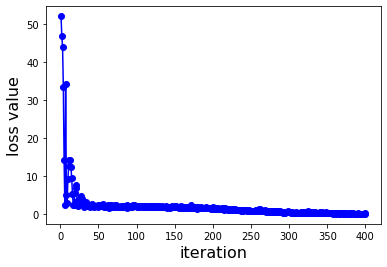

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r1/model_r1_1.25k_100epochs')